# Exact Optimality of Communication-Privacy-Utility Tradeoffs in Distributed Mean Estimation 

Berivan Isik, Wei-Ning Chen, Ayfer Ozgur, Tsachy Weissman, Albert No

We study the mean estimation problem under communication and local differential
privacy constraints. While previous work has proposed order-optimal algorithms
for the same problem (i.e., asymptotically optimal as we spend more bits), exact
optimality (in the non-asymptotic setting) still has not been achieved. In this work,
we take a step towards characterizing the exact-optimal approach in the presence of
shared randomness (a random variable shared between the server and the user) and
identify several necessary conditions for exact optimality. We prove that one of the
necessary conditions is to utilize a rotationally symmetric shared random codebook.
Based on this, we propose a randomization mechanism where the codebook is a
randomly rotated simplex – satisfying the properties of the exact-optimal codebook.
The proposed mechanism is based on a k-closest encoding which we prove to be
exact-optimal for the randomly rotated simplex codebook

# Imports

In [5]:
from IPython.display import clear_output
import copy
import glob

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.gridspec as gridspec
matplotlib.use('Agg')
%matplotlib inline

from main import*
import numpy as np
import os

from pathlib import Path
import pickle
import pylab as plot
import scipy.io
import seaborn as sns
import sys
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')

# Run

In [ ]:
rrsc_comparison(vary='bitrate', num_itr=10, d_list=[500], n=5000, eps_list=[6])

In [ ]:
rrsc_comparison(vary='eps', num_itr=10, d_list=[500], n=5000)

# Plot

(0, 0.2)

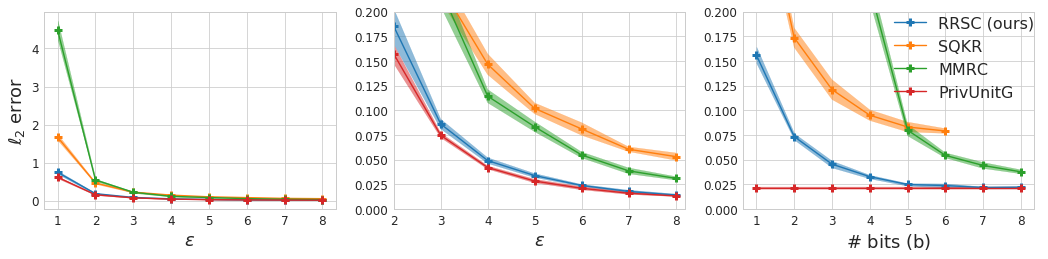

In [6]:
color_list = ['tab:blue',
             'tab:orange',
             'tab:green',
             'tab:red',]

fig = plt.figure(figsize=(24, 8))
gs = gridspec.GridSpec(2, 4)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

params={'legend.fontsize': 10, 'legend.handlelength':1}
sns.set_context('paper', font_scale=2)
sns.set_style('whitegrid')
fig=plt.figure()

results = {
            'SQKR': [],
            'MMRC': [],
            'PrivUnit': [],
            'RRSC': [],
}

std = {
            'SQKR': [],
            'MMRC': [],
            'PrivUnit': [],
            'RRSC': [],
}

epsilons = [1, 2, 3, 4, 5, 6, 7, 8]
 
fname = os.path.join('Data', 'sweep_eps_d_500_eps_8_n_5000_M_256.mat')
mat = scipy.io.loadmat(fname)
results['SQKR'] = mat['mse_dict'][0][0][0][0]
results['MMRC'] = mat['mse_dict'][0][0][1][0]
results['PrivUnit'] = mat['mse_dict'][0][0][2][0]
results['RRSC'] = mat['mse_dict'][0][0][3][0]

std['SQKR'] = np.std(mat['run_mse'][0][0][0], axis=1)
std['MMRC'] = np.std(mat['run_mse'][0][0][1], axis=1)
std['PrivUnit'] = np.std(mat['run_mse'][0][0][2], axis=1)
std['RRSC'] = np.std(mat['run_mse'][0][0][3], axis=1)

marker_style = dict(marker='+',markeredgewidth=3, markersize=8)
    
ax1.plot(epsilons, results['RRSC'], fillstyle='none', label='RRSC (ours)', color=color_list[0], **marker_style)
ax1.plot(epsilons, results['SQKR'], fillstyle='none', label='SQKR', color=color_list[1],  **marker_style)
ax1.plot(epsilons, results['MMRC'], fillstyle='none', label='MMRC', color=color_list[2],  **marker_style)
ax1.plot(epsilons, results['PrivUnit'], fillstyle='none', label='PrivUnitG', color=color_list[3],  **marker_style)

ax1.fill_between(epsilons, results['RRSC'] - std['RRSC'], results['RRSC'] + std['RRSC'],color=color_list[0], alpha=0.5)
ax1.fill_between(epsilons, results['SQKR'] - std['SQKR'], results['SQKR'] + std['SQKR'],color=color_list[1], alpha=0.5)
ax1.fill_between(epsilons, results['MMRC'] - std['MMRC'], results['MMRC'] + std['MMRC'],color=color_list[2], alpha=0.5)
ax1.fill_between(epsilons, results['PrivUnit'] - std['PrivUnit'], results['PrivUnit'] + std['PrivUnit'],
                 color=color_list[3], alpha=0.5)

ax1.set_ylabel(r"$\ell_2$ error", fontsize=18)
ax1.set_xlabel(r"$\epsilon$", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.grid()
ax1.grid('on')


############################
ax2.plot(epsilons, results['RRSC'], fillstyle='none', label='RRSC (ours)', color=color_list[0], **marker_style)
ax2.plot(epsilons, results['SQKR'], fillstyle='none', label='SQKR', color=color_list[1],  **marker_style)
ax2.plot(epsilons, results['MMRC'], fillstyle='none', label='MMRC', color=color_list[2],  **marker_style)
ax2.plot(epsilons, results['PrivUnit'], fillstyle='none', label='PrivUnitG', color=color_list[3],  **marker_style)

ax2.fill_between(epsilons, results['RRSC'] - std['RRSC'], results['RRSC'] + std['RRSC'],color=color_list[0], alpha=0.5)
ax2.fill_between(epsilons, results['SQKR'] - std['SQKR'], results['SQKR'] + std['SQKR'],color=color_list[1], alpha=0.5)
ax2.fill_between(epsilons, results['MMRC'] - std['MMRC'], results['MMRC'] + std['MMRC'],color=color_list[2], alpha=0.5)
ax2.fill_between(epsilons, results['PrivUnit'] - std['PrivUnit'], results['PrivUnit'] + std['PrivUnit'],
                 color=color_list[3], alpha=0.5)

ax2.set_xlabel(r"$\epsilon$", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.grid()
ax2.grid('on')
ax2.set_xlim([2, 8.2])
ax2.set_ylim([0, 0.2])


############################
results = {
            'SQKR': [],
            'MMRC': [],
            'PrivUnit': [],
            'RRSC': [],
}

std = {
            'SQKR': [],
            'MMRC': [],
            'PrivUnit': [],
            'RRSC': [],
}

bitrates = [1, 2, 3, 4, 5, 6, 7, 8]
 
fname = os.path.join('Data', 'sweep_bitrate_d_500_eps_6_n_5000_M_256.mat')
mat = scipy.io.loadmat(fname)
results['SQKR'] = mat['mse_dict'][0][0][0][0]
results['MMRC'] = mat['mse_dict'][0][0][1][0]
results['PrivUnit'] = mat['mse_dict'][0][0][2][0]
results['RRSC'] = mat['mse_dict'][0][0][3][0]

std['SQKR'] = np.std(mat['run_mse'][0][0][0], axis=1)
std['MMRC'] = np.std(mat['run_mse'][0][0][1], axis=1)
std['PrivUnit'] = np.std(mat['run_mse'][0][0][2], axis=1)
std['RRSC'] = np.std(mat['run_mse'][0][0][3], axis=1)

    
marker_style = dict(marker='+',markeredgewidth=3, markersize=8)
ax3.plot(bitrates, results['RRSC'], fillstyle='none', label='RRSC (ours)', color=color_list[0], **marker_style)
ax3.plot(bitrates[:6], results['SQKR'][:6], fillstyle='none', label='SQKR', color=color_list[1],  **marker_style)
ax3.plot(bitrates, results['MMRC'], fillstyle='none', label='MMRC', color=color_list[2],  **marker_style)
ax3.plot(bitrates, results['PrivUnit'], fillstyle='none', label='PrivUnitG', color=color_list[3],  **marker_style)

ax3.fill_between(bitrates, results['RRSC'] - std['RRSC'], results['RRSC'] + std['RRSC'],color=color_list[0], alpha=0.5)
ax3.fill_between(bitrates[:6], results['SQKR'][:6] - std['SQKR'][:6], results['SQKR'][:6] + std['SQKR'][:6],color=color_list[1], alpha=0.5)
ax3.fill_between(bitrates, results['MMRC'] - std['MMRC'], results['MMRC'] + std['MMRC'],color=color_list[2], alpha=0.5)
ax3.fill_between(bitrates, results['PrivUnit'] - std['PrivUnit'], results['PrivUnit'] + std['PrivUnit'],
                 color=color_list[3], alpha=0.5)


ax3.set_xlabel(r"$\#$ bits (b)", fontsize=18)
ax3.tick_params(axis='both', which='major', labelsize=12)
ax3.grid()
ax3.grid('on')
ax3.legend(fontsize=16, loc='upper right', bbox_to_anchor=(1.05, 1.05))
ax3.set_ylim([0, 0.2])